In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
#import netCDF4

### Brest data : 
https://data.shom.fr/donnees/refmar/3#001=eyJjIjpbLTUwMDM4NS41NTcyMTYyMjcsNjE3MDc5My44NDMxMzg3NjFdLCJ6Ijo2LCJyIjowLCJsIjpbeyJ0eXBlIjoiSU5URVJOQUxfTEFZRVIiLCJpZGVudGlmaWVyIjoiRkRDX0dFQkNPX1BZUi1QTkdfMzg1N19XTVRTIiwib3BhY2l0eSI6MSwidmlzaWJpbGl0eSI6dHJ1ZX1dfQ==
### List of places:
- all SHOM data, hourly https://data.shom.fr/donnees/refmar/3/download#001=eyJjIjpbLTUwMDM4NS41NTcyMTYyMjcsNjE3MDc5My44NDMxMzg3NjFdLCJ6Ijo2LCJyIjowLCJsIjpbeyJ0eXBlIjoiSU5URVJOQUxfTEFZRVIiLCJpZGVudGlmaWVyIjoiRkRDX0dFQkNPX1BZUi1QTkdfMzg1N19XTVRTIiwib3BhY2l0eSI6MSwidmlzaWJpbGl0eSI6dHJ1ZX1dfQ==

- monthly and annual : https://psmsl.org/data/obtaining/stations/1.php

- https://www.sonel.org/spip.php?page=maregraphe&idStation=1736

- Tide gauges at different parts of France https://tidesandcurrents.noaa.gov/sltrends/sltrends_global_country.html?gid=1268 

### Brest tide gauge paper : 
https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GL035783




In [2]:
fp = '/Users/annalea_albright/Downloads/maregraphie/3_2000.nc'
if 0:
    # single data set
    ds = xr.open_dataset(
                        fp,
                         decode_cf=False
    )

if 1:
    # all in the folder, hourly data from about 2000 - 2022
    ds = xr.open_mfdataset('/Users/annalea_albright/Downloads/maregraphie/*.nc',
                      decode_cf=False
                      )

#print(ds.variables)

t_unit = ds.variables['TIME'] 
t_unit.attrs['units']

attrs = {'units': 'hours since 1700-01-01 00:00:00.0Z',
        'calendar': 'gregorian'} # proleptic_gregorian, gregorian

ds = xr.Dataset(
    {
        'time': ('time', t_unit, attrs),
        'sea_level': ('time', ds.variables['Source4']),
    })


ds = xr.decode_cf(ds, use_cftime=True)

datetimeindex = ds.indexes['time'].to_datetimeindex()
ds['time'] = datetimeindex
print(ds)

<xarray.Dataset>
Dimensions:    (time: 202550)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-05T23:00:00 ... 2023-04-02
Data variables:
    sea_level  (time) float32 dask.array<chunksize=(8646,), meta=np.ndarray>


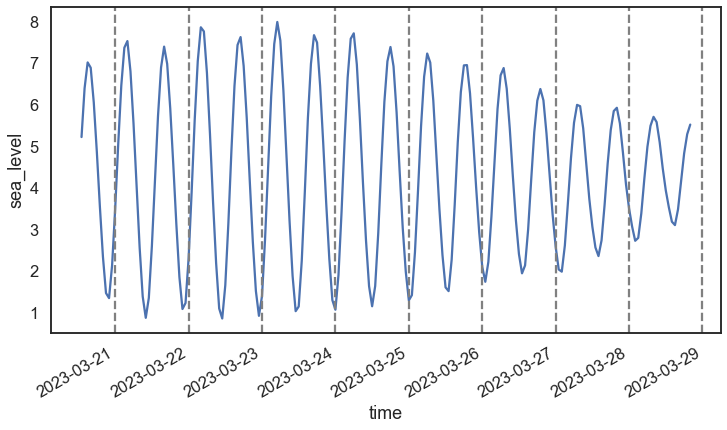

In [3]:
sns.set(context='talk', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

ax = ds['sea_level'].isel(time=slice(-300,-100)).plot(figsize=(12,6))
xcoords = [f'03-{n}-23' for n in range(21,30)]
xcoords = pd.to_datetime(xcoords, format="%m-%d-%y") 
for xc in xcoords:
    plt.axvline(x=xc, color='grey', linestyle='--')

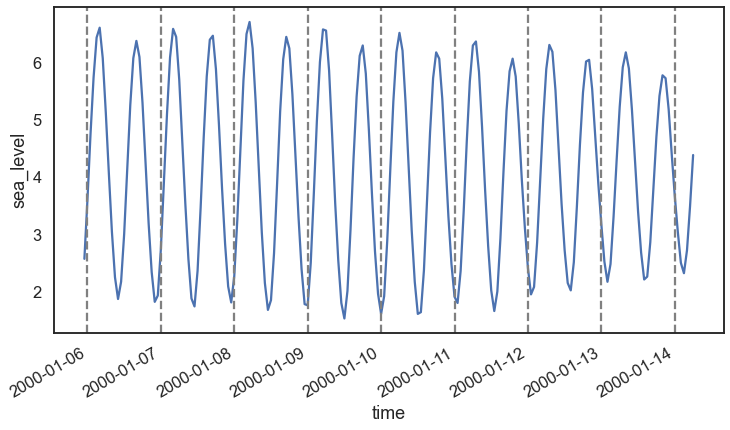

In [4]:
ax = ds['sea_level'].isel(time=slice(0,200)).plot(figsize=(12,6))
#plot(x='Date', y='Montreal_Median_Price', )
xcoords = [f'01-{n}-00' for n in range(6,15)]
xcoords = pd.to_datetime(xcoords, format="%m-%d-%y") 
for xc in xcoords:
    plt.axvline(x=xc, color='grey', linestyle='--')

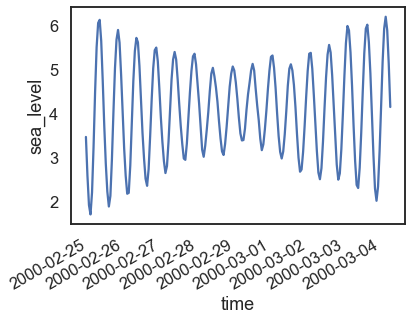

In [5]:
ds['sea_level'].isel(time=slice(1200,1400)).plot()

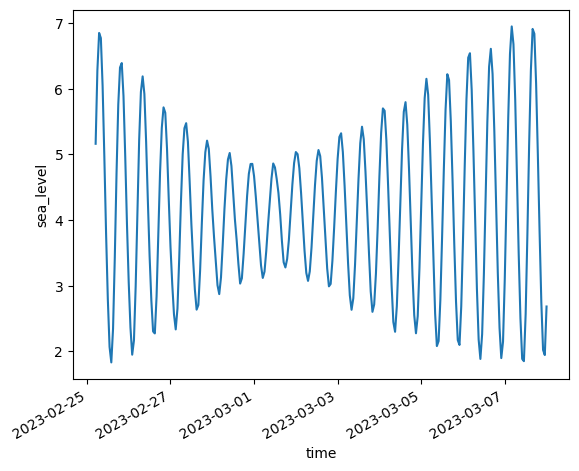

In [90]:
ds['sea_level'].isel(time=slice(-860,-600)).plot()

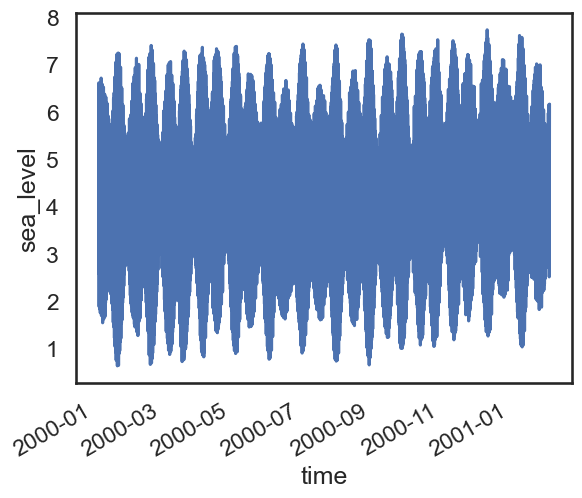

In [176]:
ds['sea_level'].isel(time=slice(0,9_500)).plot()

# do an FFT ... what scales of variability

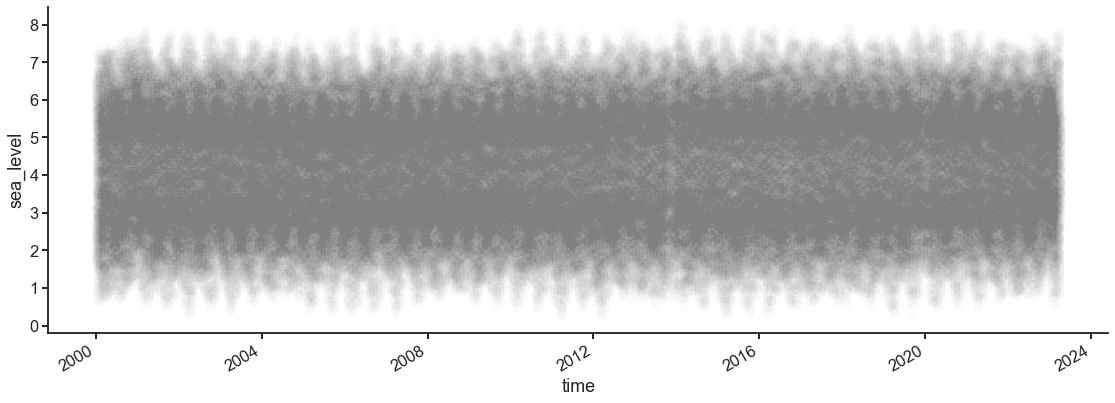

In [8]:
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
ds.sea_level.plot(
     marker='o',
    color="grey",
    alpha=0.01,
    linewidth=0,
    figsize=(19,6),
)
sns.despine()
# quantile regression?
# split into diurnal, seasonal, trend?

minimum is 4.14 m
maximum is 4.27 m
difference is 0.12 m


Text(0.5, 1.0, 'Mean seasonal cycle: \n difference = 0.12 m')

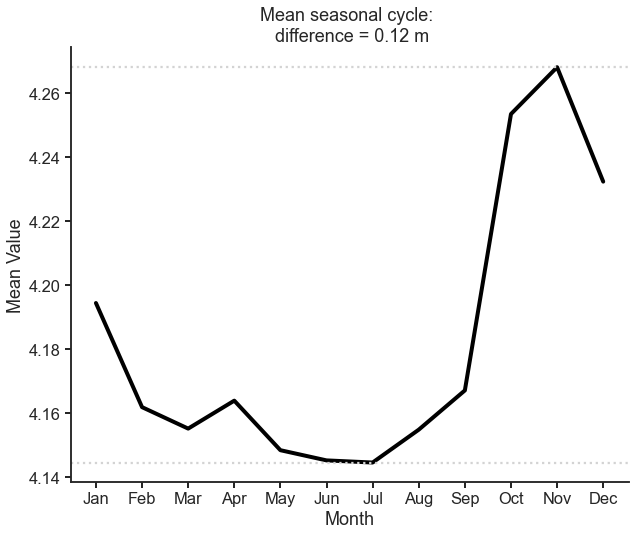

In [44]:

sns.set(context='talk', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)


plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# Load the time series data from a CSV file (replace with your own data)
data = ds['sea_level'].to_dataframe()

# Convert the date column to datetime if needed
data['Date'] = pd.to_datetime(ds['time'])

# Extract the month and year from the date column
data['Month'] = data['Date'].dt.month

# Calculate the mean seasonal cycle
mean_seasonal_cycle = data.groupby('Month')['sea_level'].mean()

# Plot the mean seasonal cycle
plt.figure(figsize=(10,8))
plt.plot(mean_seasonal_cycle.index, mean_seasonal_cycle.values,
         color="black",
         linewidth=4,
        )
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('Mean Seasonal Cycle')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sns.despine()

print('minimum is', np.round(mean_seasonal_cycle.min(),2), 'm')
print('maximum is', np.round(mean_seasonal_cycle.max(),2), 'm')
print('difference is', np.round(mean_seasonal_cycle.max() - mean_seasonal_cycle.min(),2), 'm')

plt.axhline(mean_seasonal_cycle.min(), color="lightgrey", linestyle="dotted")
plt.axhline(mean_seasonal_cycle.max(), color="lightgrey", linestyle="dotted")
diff_max_min = round(mean_seasonal_cycle.max() - mean_seasonal_cycle.min(),2)
#plt.title(f': \n difference is {diff_max_min} m')
plt.title("Mean seasonal cycle: \n difference = {:.2f} m".format(diff_max_min))

### Find max within each year

In [37]:
ds['sea_level'].time[:100]

<xarray.DataArray 'time' (time: 100)>
array(['2000-01-05T23:00:00.000000000', '2000-01-06T00:00:00.000000000',
       '2000-01-06T01:00:00.000000000', '2000-01-06T02:00:00.000000000',
       '2000-01-06T03:00:00.000000000', '2000-01-06T04:00:00.000000000',
       '2000-01-06T05:00:00.000000000', '2000-01-06T06:00:00.000000000',
       '2000-01-06T07:00:00.000000000', '2000-01-06T08:00:00.000000000',
       '2000-01-06T09:00:00.000000000', '2000-01-06T10:00:00.000000000',
       '2000-01-06T11:00:00.000000000', '2000-01-06T12:00:00.000000000',
       '2000-01-06T13:00:00.000000000', '2000-01-06T14:00:00.000000000',
       '2000-01-06T15:00:00.000000000', '2000-01-06T16:00:00.000000000',
       '2000-01-06T17:00:00.000000000', '2000-01-06T18:00:00.000000000',
       '2000-01-06T19:00:00.000000000', '2000-01-06T20:00:00.000000000',
       '2000-01-06T21:00:00.000000000', '2000-01-06T22:00:00.000000000',
       '2000-01-06T23:00:00.000000000', '2000-01-07T00:00:00.000000000',
       '2000-01-07T01:00:00.000000000', '2000-01-07T02:00:00.000000000',
       '2000-01-07T03:00:00.000000000', '2000-01-07T04:00:00.000000000',
       '2000-01-07T05:00:00.000000000', '2000-01-07T06:00:00.000000000',
       '2000-01-07T07:00:00.000000000', '2000-01-07T08:00:00.000000000',
       '2000-01-07T09:00:00.000000000', '2000-01-07T10:00:00.000000000',
       '2000-01-07T11:00:00.000000000', '2000-01-07T12:00:00.000000000',
       '2000-01-07T13:00:00.000000000', '2000-01-07T14:00:00.000000000',
       '2000-01-07T15:00:00.000000000', '2000-01-07T16:00:00.000000000',
       '2000-01-07T17:00:00.000000000', '2000-01-07T18:00:00.000000000',
       '2000-01-07T19:00:00.000000000', '2000-01-07T20:00:00.000000000',
       '2000-01-07T21:00:00.000000000', '2000-01-07T22:00:00.000000000',
       '2000-01-07T23:00:00.000000000', '2000-01-08T00:00:00.000000000',
       '2000-01-08T01:00:00.000000000', '2000-01-08T02:00:00.000000000',
       '2000-01-08T03:00:00.000000000', '2000-01-08T04:00:00.000000000',
       '2000-01-08T05:00:00.000000000', '2000-01-08T06:00:00.000000000',
       '2000-01-08T07:00:00.000000000', '2000-01-08T08:00:00.000000000',
       '2000-01-08T09:00:00.000000000', '2000-01-08T10:00:00.000000000',
       '2000-01-08T11:00:00.000000000', '2000-01-08T12:00:00.000000000',
       '2000-01-08T13:00:00.000000000', '2000-01-08T14:00:00.000000000',
       '2000-01-08T15:00:00.000000000', '2000-01-08T16:00:00.000000000',
       '2000-01-08T17:00:00.000000000', '2000-01-08T18:00:00.000000000',
       '2000-01-08T19:00:00.000000000', '2000-01-08T20:00:00.000000000',
       '2000-01-08T21:00:00.000000000', '2000-01-08T22:00:00.000000000',
       '2000-01-08T23:00:00.000000000', '2000-01-09T00:00:00.000000000',
       '2000-01-09T01:00:00.000000000', '2000-01-09T02:00:00.000000000',
       '2000-01-09T03:00:00.000000000', '2000-01-09T04:00:00.000000000',
       '2000-01-09T05:00:00.000000000', '2000-01-09T06:00:00.000000000',
       '2000-01-09T07:00:00.000000000', '2000-01-09T08:00:00.000000000',
       '2000-01-09T09:00:00.000000000', '2000-01-09T10:00:00.000000000',
       '2000-01-09T11:00:00.000000000', '2000-01-09T12:00:00.000000000',
       '2000-01-09T13:00:00.000000000', '2000-01-09T14:00:00.000000000',
       '2000-01-09T15:00:00.000000000', '2000-01-09T16:00:00.000000000',
       '2000-01-09T17:00:00.000000000', '2000-01-09T18:00:00.000000000',
       '2000-01-09T19:00:00.000000000', '2000-01-09T20:00:00.000000000',
       '2000-01-09T21:00:00.000000000', '2000-01-09T22:00:00.000000000',
       '2000-01-09T23:00:00.000000000', '2000-01-10T00:00:00.000000000',
       '2000-01-10T01:00:00.000000000', '2000-01-10T02:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-05T23:00:00 ... 2000-01-10T02:00:00

Text(0.5, 1.0, 'Median value per year: \n mean, median across time = 4.20, 4.19 m')

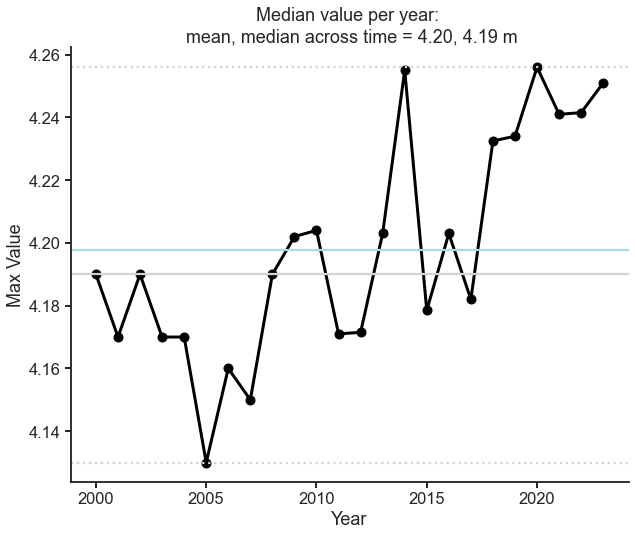

In [46]:
data = ds['sea_level'].to_dataframe()

# Convert the date column to datetime if needed
data['Date'] = pd.to_datetime(ds['time'])

data['year'] = data['Date'].dt.year

#max_per_year = data.groupby('year')['sea_level'].quantile(0.5) #, .max()
max_per_year = data.groupby('year')['sea_level'].max()

# Plot
plt.figure(figsize=(10,8))
plt.plot(max_per_year.index, max_per_year.values,
         color="black",
         linewidth=3,
         marker='o',
         #linewidth=0,
        )
plt.xlabel('Year')
plt.ylabel('Max Value')
sns.despine()

plt.axhline(max_per_year.min(), color="lightgrey", linestyle="dotted")
plt.axhline(max_per_year.max(), color="lightgrey", linestyle="dotted")
plt.axhline(np.quantile(max_per_year,0.5), color="lightgrey", linestyle="solid")
plt.axhline(max_per_year.mean(), color="lightblue", linestyle="solid")
diff_max_min = round(max_per_year.max() - max_per_year.min(),2)
#plt.title(f': \n difference is {diff_max_min} m')
#plt.title("Maximum value per year: \n difference = {:.2f} m".format(diff_max_min))
# Median, Maximum
plt.title("Maximum value per year: \n mean, median across time = {:.2f}, {:.2f} m".format(max_per_year.mean(), max_per_year.median()))

minimum is 7.62 m
maximum is 8.08 m
difference is 0.45 m


Text(0.5, 1.0, 'Maximum value per year: \n mean, median = 7.86, 7.91 m')

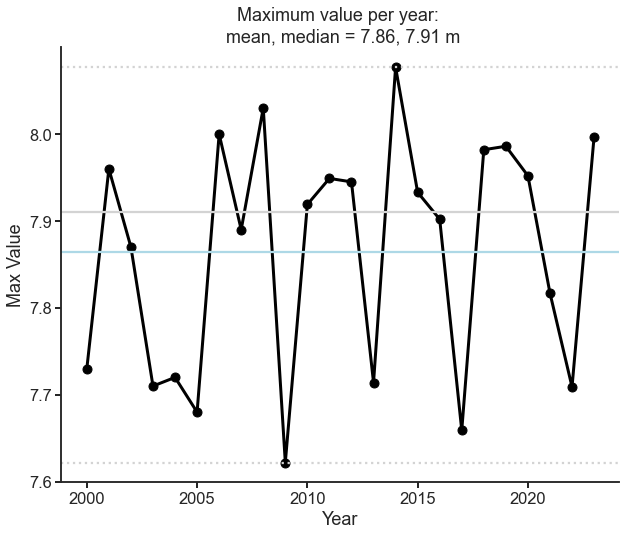

In [35]:
data = ds['sea_level'].to_dataframe()

# Convert the date column to datetime if needed
data['Date'] = pd.to_datetime(ds['time'])

# Extract the month and year from the date column
data['year'] = data['Date'].dt.year

max_per_year = data.groupby('year')['sea_level'].max()

# Plot
plt.figure(figsize=(10,8))
plt.plot(max_per_year.index, max_per_year.values,
         color="black",
         linewidth=3,
         marker='o',
         #linewidth=0,
        )
plt.xlabel('Year')
plt.ylabel('Max Value')
#plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sns.despine()

print('minimum is', np.round(max_per_year.min(),2), 'm')
print('maximum is', np.round(max_per_year.max(),2), 'm')
print('difference is', np.round(max_per_year.max() - max_per_year.min(),2), 'm')

plt.axhline(max_per_year.min(), color="lightgrey", linestyle="dotted")
plt.axhline(max_per_year.max(), color="lightgrey", linestyle="dotted")
plt.axhline(np.quantile(max_per_year,0.5), color="lightgrey", linestyle="solid")
plt.axhline(max_per_year.mean(), color="lightblue", linestyle="solid")
diff_max_min = round(max_per_year.max() - max_per_year.min(),2)
#plt.title(f': \n difference is {diff_max_min} m')
#plt.title("Maximum value per year: \n difference = {:.2f} m".format(diff_max_min))
plt.title("Maximum value per year: \n mean, median = {:.2f}, {:.2f} m".format(max_per_year.mean(), max_per_year.median()))

minimum is 3.43 m
maximum is 4.94 m
difference is 1.51 m


Text(0.5, 1.0, 'Mean diurnal cycle: \n difference = 1.51 m')

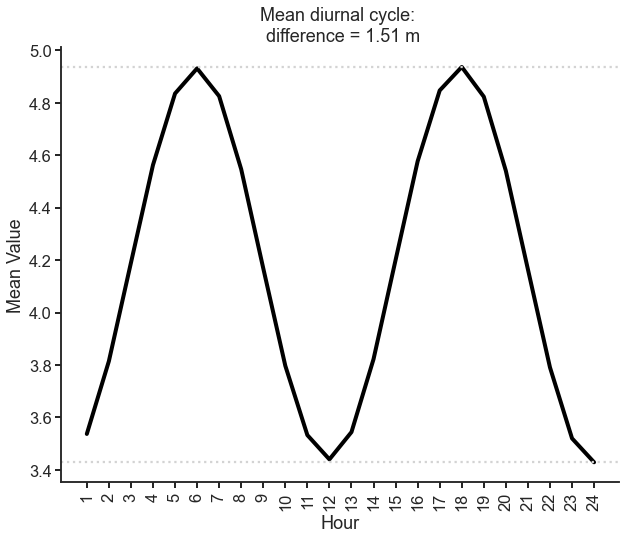

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# Load the time series data from a CSV file (replace with your own data)
data = ds['sea_level'].to_dataframe()

# Convert the date column to datetime if needed
data['Date'] = pd.to_datetime(ds['time'])

# Extract the month and year from the date column
data['Month'] = data['Date'].dt.hour

# Calculate the mean seasonal cycle
mean_seasonal_cycle = data.groupby('Month')['sea_level'].mean()

# Plot the mean seasonal cycle
plt.figure(figsize=(10,8))
plt.plot(mean_seasonal_cycle.index, mean_seasonal_cycle.values,
        color="black",
        linewidth=4)
plt.xlabel('Hour')
plt.ylabel('Mean Value')
plt.xticks(range(0, 24), np.arange(1,25), rotation=90)
sns.despine()

print('minimum is', np.round(mean_seasonal_cycle.min(),2), 'm')
print('maximum is', np.round(mean_seasonal_cycle.max(),2), 'm')
print('difference is', np.round(mean_seasonal_cycle.max() - mean_seasonal_cycle.min(),2), 'm')

plt.axhline(mean_seasonal_cycle.min(), color="lightgrey", linestyle="dotted")
plt.axhline(mean_seasonal_cycle.max(), color="lightgrey", linestyle="dotted")
diff_max_min = round(mean_seasonal_cycle.max() - mean_seasonal_cycle.min(),2)
#plt.title(f': \n difference is {diff_max_min} m')
plt.title("Mean diurnal cycle: \n difference = {:.2f} m".format(diff_max_min))

minimum is 1.54 m
maximum is 1.66 m
difference is 0.12 m


Text(0.5, 1.0, 'Mean seasonal cycle: \n difference = 0.12 m')

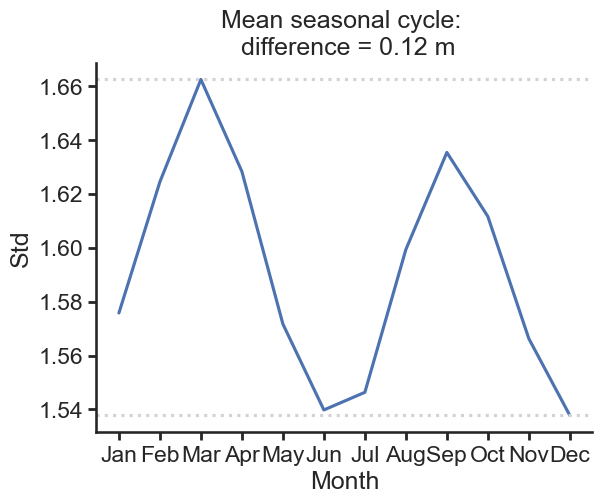

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# Load the time series data from a CSV file (replace with your own data)
data = ds['sea_level'].to_dataframe()

# Convert the date column to datetime if needed
data['Date'] = pd.to_datetime(ds['time'])

# Extract the month and year from the date column
data['Month'] = data['Date'].dt.month

# Calculate the mean seasonal cycle
std_seasonal_cycle = data.groupby('Month')['sea_level'].std()

# Plot the mean seasonal cycle
plt.plot(std_seasonal_cycle.index, std_seasonal_cycle.values)
plt.xlabel('Month')
plt.ylabel('Std')
plt.title('Std of Seasonal Cycle')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(range(1, 13), months)
sns.despine()

print('minimum is', np.round(std_seasonal_cycle.min(),2), 'm')
print('maximum is', np.round(std_seasonal_cycle.max(),2), 'm')
print('difference is', np.round(std_seasonal_cycle.max() - std_seasonal_cycle.min(),2), 'm')

plt.axhline(std_seasonal_cycle.min(), color="lightgrey", linestyle="dotted")
plt.axhline(std_seasonal_cycle.max(), color="lightgrey", linestyle="dotted")
diff_max_min = round(std_seasonal_cycle.max() - std_seasonal_cycle.min(),2)
#plt.title(f': \n difference is {diff_max_min} m')
plt.title("Mean seasonal cycle: \n difference = {:.2f} m".format(diff_max_min))

### monthly (instead of hourly) data

In [231]:
# data are in mm, convert to m
fp_gauge_Brest = '/Users/annalea_albright/Downloads/1.rlrdata_monthly.txt'
df=pd.read_csv(fp_gauge_Brest, sep=';', header=None,)
#print(df.head())
df.columns =['Year', 'SLR', '', '']
#print(df.head())
df = df[["Year", "SLR"]]
df.replace(-99999,np.NaN, inplace=True)

df["SLR"] = df["SLR"] / 1000
# select from date onwards
start_date = 1955
end_date = 2022
#print(df['Year'])

# Select DataFrame rows between two dates
mask = (df['Year'] > start_date) & (df['Year'] < end_date)
sel_sl = df.loc[mask]
print('SLR data:', sel_sl['SLR'].values[:100])
print('year (monthly):', sel_sl['Year'].values[:100])

SLR data: [7.176 7.191 7.016 6.926 7.04  7.039 7.011 7.013 7.039 7.09  7.115 7.126
 7.072 6.871 7.008 6.915 6.862 6.881 6.987 7.028 7.096 6.981 6.985 7.056
 6.946 7.156 7.112 6.895 6.978 6.978 6.983 6.984 7.014 7.009 7.073 7.157
 7.079 7.058 7.047 6.9   6.969 7.027 7.025 7.08  7.147 7.032 6.984 7.225
 7.154 6.931 7.1   7.059 6.958 6.976 6.977 6.97  7.01  7.107 7.106 7.198
 7.028 7.167 7.203 7.02  7.024 6.992 7.059 7.082 7.067 7.257 7.302 7.134
 7.117 7.039 6.936 7.119 7.033 6.95  6.988 7.009 7.106 7.183 7.123 7.209
 7.138 6.916 7.074 6.986 6.972 6.944 7.033 7.014 7.056 7.03  7.101 6.985
 7.002 7.077 7.043 7.043]
year (monthly): [1955.0417 1955.125  1955.2083 1955.2917 1955.375  1955.4583 1955.5417
 1955.625  1955.7083 1955.7917 1955.875  1955.9583 1956.0417 1956.125
 1956.2083 1956.2917 1956.375  1956.4583 1956.5417 1956.625  1956.7083
 1956.7917 1956.875  1956.9583 1957.0417 1957.125  1957.2083 1957.2917
 1957.375  1957.4583 1957.5417 1957.625  1957.7083 1957.7917 1957.875
 1957.9583 

Text(0, 0.5, 'monthly sea level (m)')

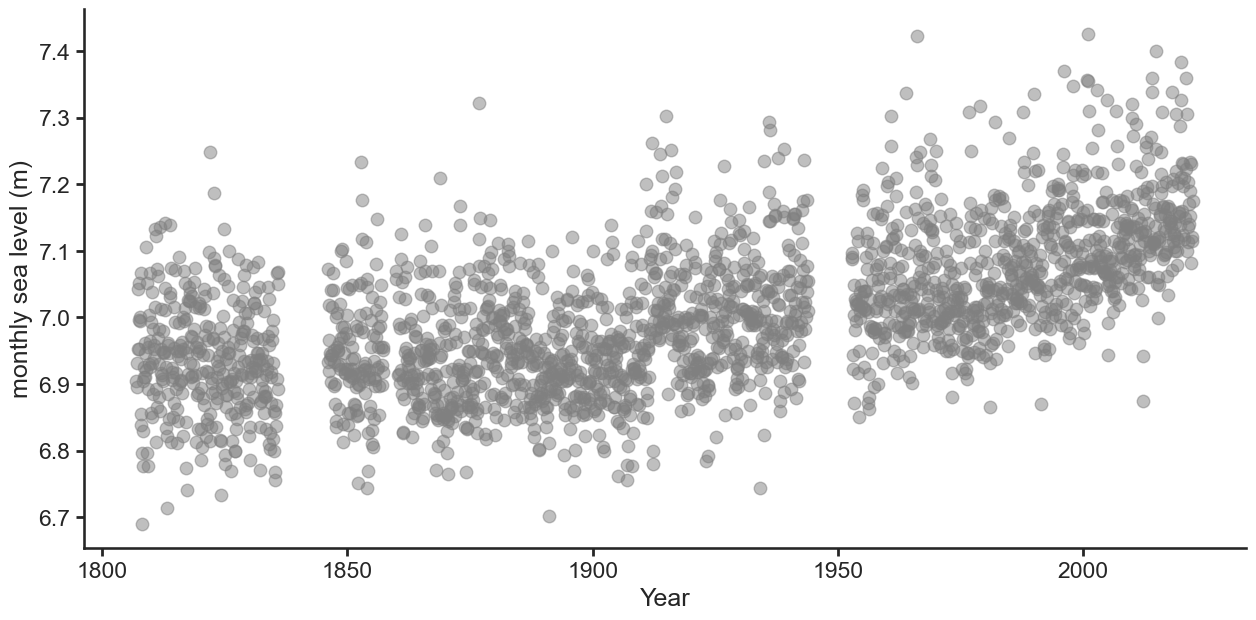

In [254]:
plt.figure(figsize=(15,7))
df_plot = df.set_index('Year')
(df_plot["SLR"]).plot(marker='o',
                         #ms=12,
                         linewidth=0, 
                         color="gray",
                           alpha=0.5,
                         label="historical obs."
                         )
sns.despine()
plt.ylabel('monthly sea level (m)')

1955-01-01    7.176
1955-02-01    7.191
1955-03-01    7.016
1955-04-01    6.926
1955-05-01    7.040
              ...  
2021-08-01    7.140
2021-09-01    7.190
2021-10-01    7.234
2021-11-01    7.153
2021-12-01    7.230
Freq: MS, Name: sl, Length: 804, dtype: float64


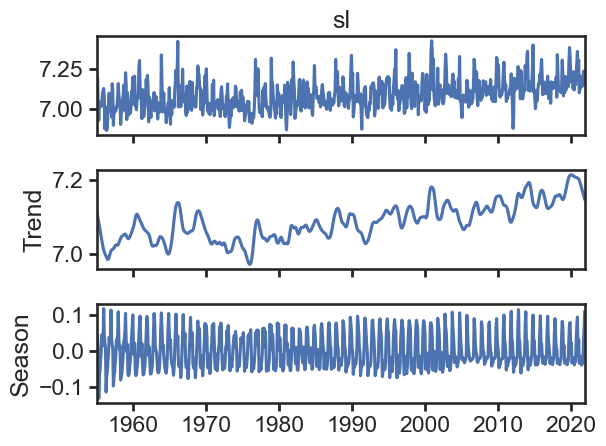

In [248]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/stl_decomposition.html

from statsmodels.tsa.seasonal import STL

sl_series = pd.Series(
    slr_monthly_interp.values,
    index=pd.date_range("01-1955", periods=len(sl), freq="MS"), name="sl"
)
print(sl_series)
#sl_series.describe()

#sl_series = ds['sea_level'].isel(time=slice(0,9000))
stl = STL(sl_series, seasonal=13)
res = stl.fit()
fig = res.plot(
    resid=False
)

### FFT

In [113]:
#%% https://medium.com/@tiofaizintio/extract-seasonality-patterns-from-climate-data-with-fast-fourier-transform-fft-de479303f01


from scipy import fftpack
import scipy as sp
from numpy.fft import fftfreq
from scipy.fftpack import *
from scipy.signal import butter, filtfilt , freqz
import pandas as pd

In [255]:
sl_series

1955-01-01    7.176
1955-02-01    7.191
1955-03-01    7.016
1955-04-01    6.926
1955-05-01    7.040
              ...  
2021-08-01    7.140
2021-09-01    7.190
2021-10-01    7.234
2021-11-01    7.153
2021-12-01    7.230
Freq: MS, Name: sl, Length: 804, dtype: float64

(0.0, 1.0)

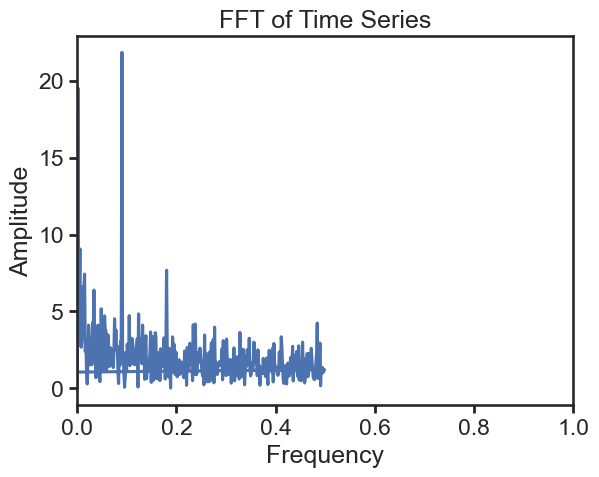

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# do with hourly data... 
start_year = 1955
end_year = 2017
dates = pd.date_range(start=f"{start_year}-02", end=f"{end_year}-2", freq="M")
n = len(dates)

t = np.arange(n)
data = sl_series.values - sl_series.mean() #np.sin(2 * np.pi * t / 12)  # Replace with your own time series data

# Perform FFT
fft_result = np.fft.fft(data)
#print(fft_result)

# Calculate the corresponding frequencies
timestep = 1  # Assumes monthly data, so each timestep is 1 month

freqs = np.fft.fftfreq(n, d=timestep)
positive_freqs = freqs[:n // 2 + 1]  # Select positive frequencies only
fft_result = fft_result[:n // 2 + 1]  # Select corresponding FFT coefficients

# Plot the FFT result
plt.plot(positive_freqs, np.abs(fft_result))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT of Time Series')
plt.xlim([0,1])

###  Annual data

   Year   SLR       
0  1807  6970  N  10
1  1808  6868  N  10
2  1809  6954  N  10
3  1810  6947  N  10
4  1811  6976  N  10


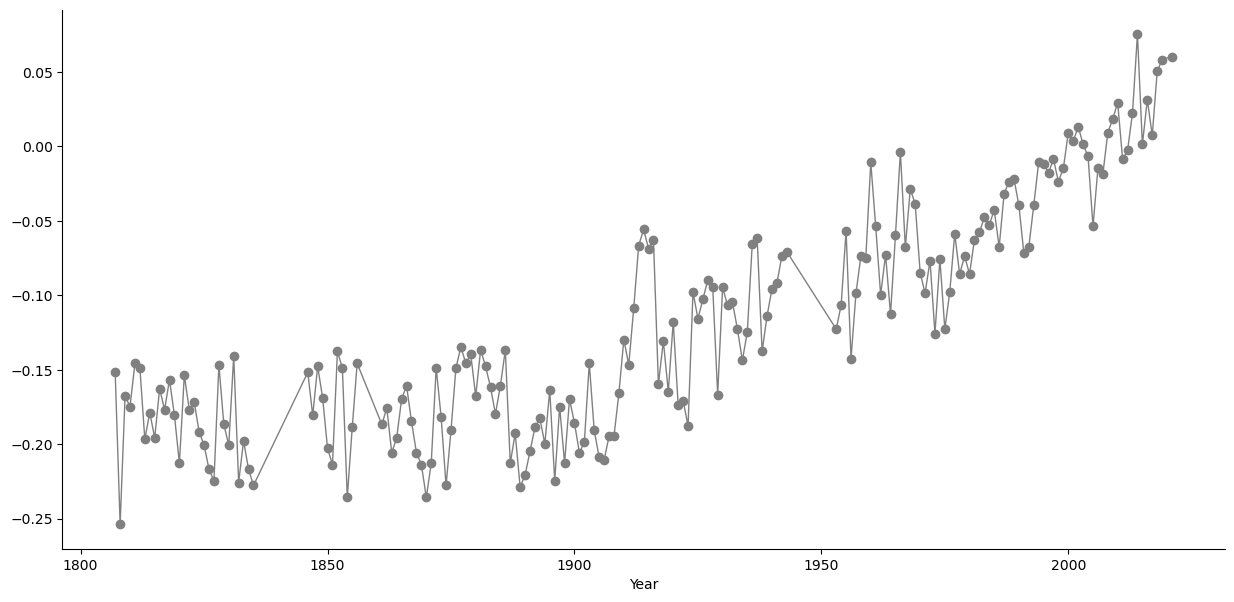

In [23]:
# data are in mm, convert to m
fp_gauge_Brest = '/Users/annalea_albright/Downloads/1.rlrdata.txt'
df=pd.read_csv(fp_gauge_Brest, sep=';', header=None,)
#print(df.head())
df.columns =['Year', 'SLR', '', '']
print(df.head())
#df.set_axis(['Year', 'SLR', '', ''], axis=1, inplace=True)
#df.set_index('Year', inplace=True)
df = df[["Year", "SLR"]]
df.set_index('Year', inplace=True)
df.replace(-99999,np.NaN, inplace=True)
#print(df.head())
#print(df.tail())

# find mean 1995-2014
rebase_mean = df[df.index.isin(np.arange(1995,2015))].mean().values[0]
df_rb = df - rebase_mean
df_rb.dropna(inplace=True)

plt.figure(figsize=(15,7))
(df_rb["SLR"]/1000).plot(marker='o',
                         #ms=12,
                         linewidth=1, 
                         color="gray",
                         label="historical obs."
                         )
sns.despine()

In [ ]:
co2_ts = (co2_ts
          .resample('D')
          .mean()
          .interpolate('linear')
         )          
          
co2_ts.head(10)

### FFT
https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/